# WSL shot location analysis

For the 2020-2021 WSL season, how are shots distributed across teams?

In [1]:
from statsbombpy import sb
from utils.statsbomb_wrappers import Match, Season
import pandas as pd

import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch

In [2]:
competitions = sb.competitions()
competitions.loc[competitions["competition_name"] == "FA Women's Super League"]

competition_id  season_id country_name         competition_name  \
22              37         90      England  FA Women's Super League   
23              37         42      England  FA Women's Super League   
24              37          4      England  FA Women's Super League   

   competition_gender  competition_youth  competition_international  \
22             female              False                      False   
23             female              False                      False   
24             female              False                      False   

   season_name               match_updated        match_updated_360  \
22   2020/2021  2023-02-25T14:52:09.326729  2021-06-13T16:17:31.694   
23   2019/2020  2023-07-25T01:08:03.214566  2021-06-13T16:17:31.694   
24   2018/2019  2023-07-24T19:50:20.881595  2021-06-13T16:17:31.694   

   match_available_360             match_available  
22                None  2023-02-25T14:52:09.326729  
23                None  2023-07-25T01:08:03.214566  
24                None  2023-07-24T19:50:20.881595

In [3]:
wsl_comp_id = 37
wsl_matches_20_21 = Season(competition_id=wsl_comp_id, season_id=90)

wsl_matches_20_21.get_matches().shape

(131, 22)

In [6]:
def plot_shots_for_season(season, team):
    matches = pd.concat(
        [season.get_matches(home_team=team), season.get_matches(away_team=team)]
    )
    shots = pd.concat(
        [
            Match(match_id=match_id).get_events(type="Shot", team=team)
            for match_id in matches["match_id"]
        ]
    )
    goals = shots.loc[shots["shot_outcome"] == "Goal"]

    pitch = Pitch(half=True, pitch_color="#000000", line_color="#ffffff", line_zorder=2)
    fig, ax = pitch.draw()

    ax.scatter(
        [shot[0] for shot in shots["location"].values],
        [shot[1] for shot in shots["location"].values],
        c=[xG for xG in shots["shot_statsbomb_xg"].values],
        s=0.5,
        cmap="autumn",
    )

    ax.scatter(
        [goal[0] for goal in goals["location"].values],
        [goal[1] for goal in goals["location"].values],
        c=[xG for xG in goals["shot_statsbomb_xg"].values],
        s=15,
        cmap="autumn",
    )

    ax.set_title(
        f"{team}, xG {sum(shots['shot_statsbomb_xg']):.2f}, goals/shots {len(goals)}/{len(shots)}"
    )

/var/folders/2n/kq7s7_094fq9kcdk5z9n34fm0000gn/T/ipykernel_15097/3900779355.py:3: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  shots = pd.concat([
/var/folders/2n/kq7s7_094fq9kcdk5z9n34fm0000gn/T/ipykernel_15097/3900779355.py:3: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  shots = pd.concat([
/var/folders/2n/kq7s7_094fq9kcdk5z9n34fm0000gn/T/ipykernel_15097/3900779355.py:3: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  shots = pd.concat([


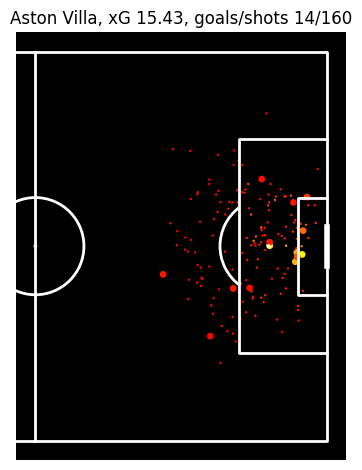

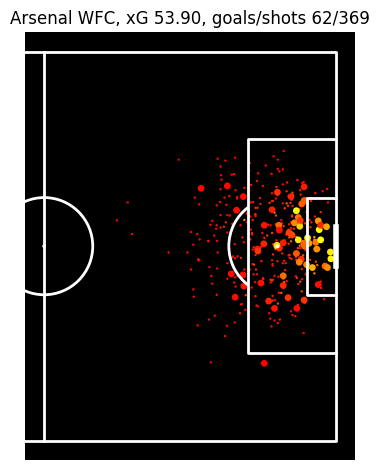

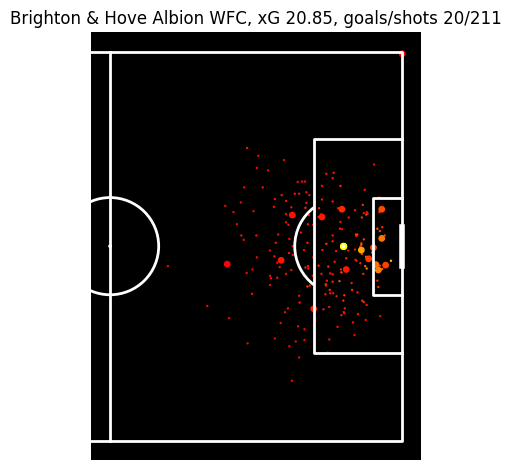

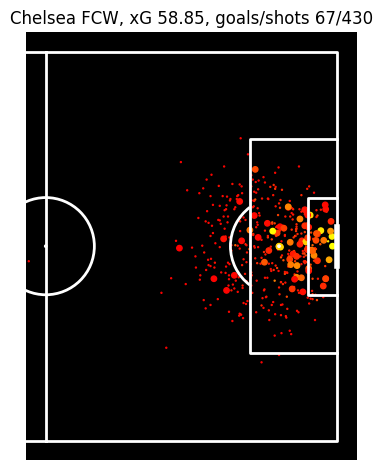

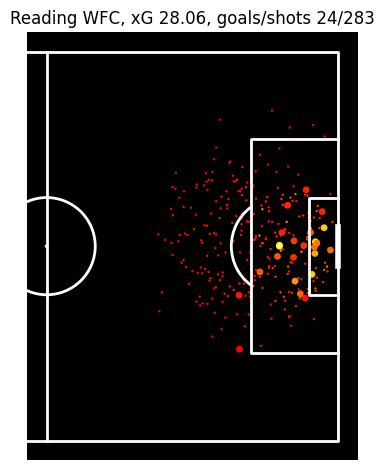

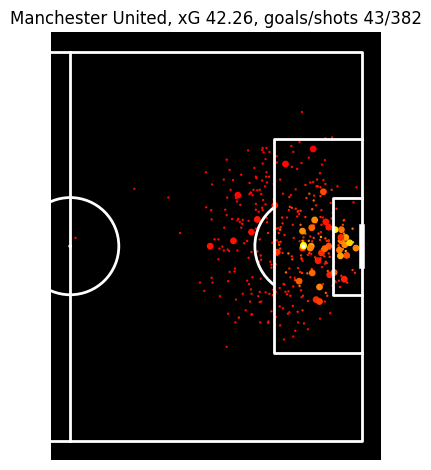

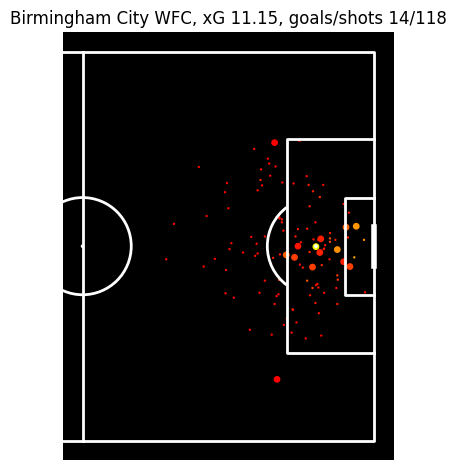

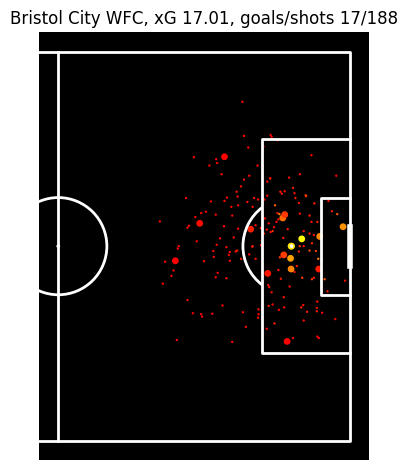

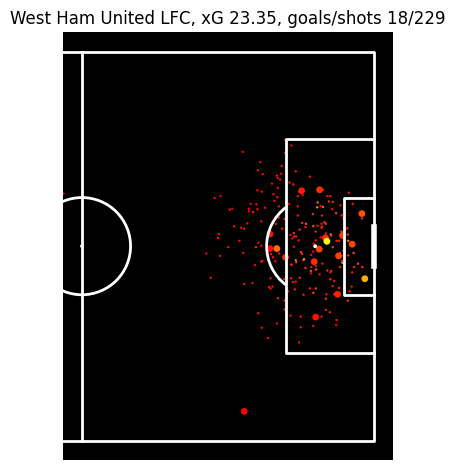

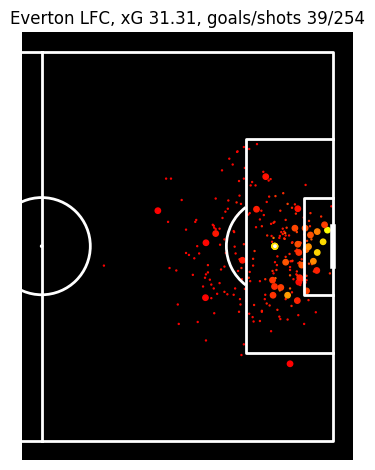

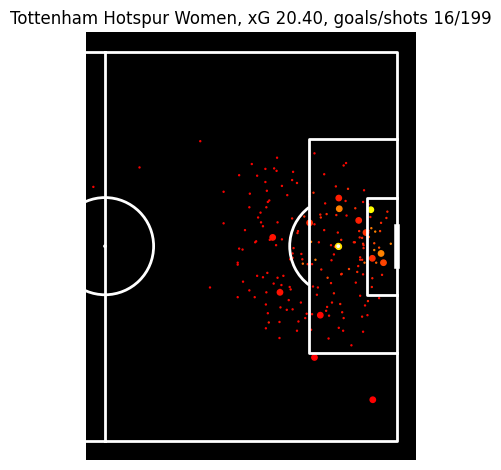

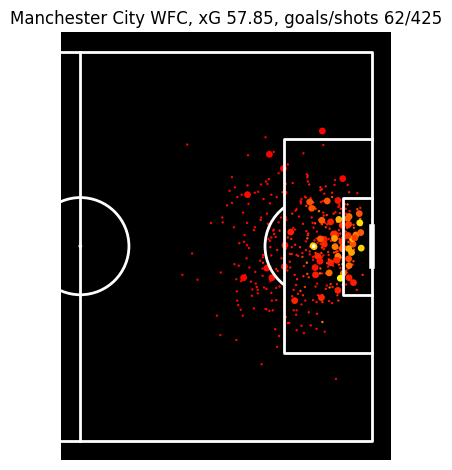

In [7]:
teams = wsl_matches_20_21.matches["home_team"].unique()

for team in teams:
    plot_shots_for_season(wsl_matches_20_21, team)